In [1]:
import numpy as np
import pandas as pd
import time
import math
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_dir(path, log=False):
    if not os.path.exists(path):
        if log:
            print('The directory', path, 'does not exist and will be created')
        os.makedirs(path)
    else:
        if log:
            print('The directory', path, ' already exists')

In [3]:
folder = os.path.join('QA_results', str(123), 'output')

### QA vs min-cut runtime up to 27 agents

In [4]:
report_filename = "IDP_report_011_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][2]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [5]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))

In [6]:
pd.set_option('display.max_rows', None)

df

Distribution No. of Agents  \
                                
0       laplace             2   
1       laplace             3   
2       laplace             4   
3       laplace             5   
4       laplace             6   
5       laplace             7   
6       laplace             8   
7       laplace             9   
8       laplace            10   
9       laplace            11   
10      laplace            12   
11      laplace            13   
12      laplace            14   
13      laplace            15   
14      laplace            16   
15      laplace            17   
16      laplace            18   
17      laplace            19   
18      laplace            20   
19      laplace            21   
20      laplace            22   
21      laplace            23   
22      laplace            24   
23      laplace            25   
24      laplace            26   
25      laplace            27   
26      uniform             2   
27      uniform             3   
28      uniform             4   
29      uniform             5   
30      uniform             6   
31      uniform             7   
32      uniform             8   
33      uniform             9   
34      uniform            10   
35      uniform            11   
36      uniform            12   
37      uniform            13   
38      uniform            14   
39      uniform            15   
40      uniform            16   
41      uniform            17   
42      uniform            18   
43      uniform            19   
44      uniform            20   
45      uniform            21   
46      uniform            22   
47      uniform            23   
48      uniform            24   
49      uniform            25   
50      uniform            26   
51      uniform            27   
52       normal             2   
53       normal             3   
54       normal             4   
55       normal             5   
56       normal             6   
57       normal             7   
58       normal             8   
59       normal             9   
60       normal            10   
61       normal            11   
62       normal            12   
63       normal            13   
64       normal            14   
65       normal            15   
66       normal            16   
67       normal            17   
68       normal            18   
69       normal            19   
70       normal            20   
71       normal            21   
72       normal            22   
73       normal            23   
74       normal            24   
75       normal            25   
76       normal            26   
77       normal            27   

                      Top-down approach using min-cut                      \
                                               Result               Value   
0                                             ['1,2']                 2.5   
1                                        ['3', '1,2']                 2.5   
2                                   ['2,4', '3', '1']                2.89   
3                                    ['1,2,5', '3,4']  21.639999999999997   
4                                  ['1,3,6', '2,4,5']  21.099999999999998   
5                                ['1,6,7', '2,3,4,5']  27.669999999999995   
6                           ['1,4,5,6,8', '2,7', '3']  29.789999999999996   
7                   ['3,9', '7', '2', '1,6,8', '4,5']               26.04   
8                   ['1,3,6,8,9,10', '2', '7', '4,5']  53.309999999999995   
9                   ['1,2,8,11', '3,5,6,7,9,10', '4']   70.17999999999999   
10                  ['2,3,4,7,12', '1,5,6,8,9,10,11']               77.12   
11            ['1,2,6,8,9,13', '3,4,10,12', '5,7,11']               76.07   
12      ['1,6,8,10,12,14', '3', '4,5,7,9,13', '2,11']               93.47   
13      ['3,5,14,15', '7,9,10,11,12', '1,2,4,6,8,13']  112.46000000000001   
14  ['1,5,8,9,11,13,15,16', '6', '14', '2,3,7,12',...  116.88999999999999   
15  ['3,4,7,11,12,16,17', '13,15', '14', '1,2,5,6,...

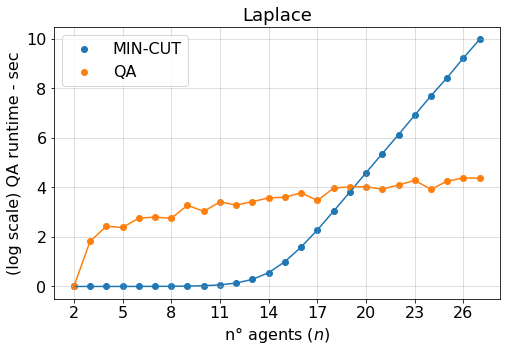

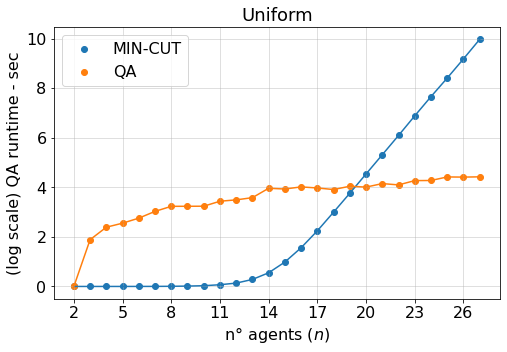

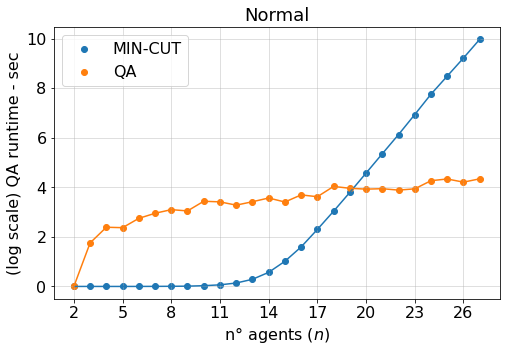

In [7]:
current_folder = file = os.path.join(folder, 'QA vs MIN-CUT')
create_dir(current_folder)
font=14

for distr in df.Distribution.unique():
    data = df[df.Distribution == distr]
    
    plt.figure(figsize=(8,5))
    x = data['No. of Agents'].to_numpy()

    
    y_BF = data[('Top-down approach using min-cut', 'TTE')].astype(float).to_numpy()
    y_QA = data[('Dwave Annealer', 'TTE')].astype(float).to_numpy()

   
    #     plt.scatter(x, y_BF, label='Brute Force')
    #     plt.plot(x, y_BF)

    #     plt.scatter(x, y_QA, label='QA')
    #     plt.plot(x, y_QA)
    #     plt.grid()
    #     plt.title(distr)
    #     plt.legend()
    #     # plt.savefig(distr+'.png')
    #     plt.show()
    

    log_BF = np.log(y_BF+1)
    log_QA = np.log(y_QA+1)
    
    plt.scatter(x, log_BF, label='MIN-CUT')
    plt.plot(x, log_BF)

    plt.scatter(x, log_QA, label='QA')
    plt.plot(x, log_QA)
    
    plt.xticks(ticks=np.arange(0, 27, 3), fontsize =font+2)
    plt.yticks(fontsize =font+2)


    plt.xlabel(r'n° agents $(n)$',fontdict={'fontsize':font+2})
    plt.ylabel(r"(log scale) QA runtime - sec",fontdict={'fontsize':font+2})

    plt.grid(alpha=.5)
    plt.title(distr.capitalize(), fontdict={'fontsize':font+4})
    plt.legend(fontsize=font+2)
    file = os.path.join(current_folder, distr+'_log.png')
    plt.savefig(file, dpi=300, bbox_inches = "tight")
    plt.show()

### Quality

In [8]:
report_filename = "IDP_report_111_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][2]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [9]:
current_folder = file = os.path.join(folder, 'Quality')
create_dir(current_folder)

In [10]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))
df.head()

Distribution No. of Agents         Brute Force                      \
                                          Result               Value   
0      laplace             2             ['1,2']                 2.5   
1      laplace             3        ['3', '1,2']                 2.5   
2      laplace             4   ['2,4', '3', '1']                2.89   
3      laplace             5    ['1,2,5', '3,4']  21.639999999999997   
4      laplace             6  ['1,3,6', '2,4,5']  21.099999999999998   

                         Top-down approach using min-cut                      \
                     TTE                          Result               Value   
0  0.0009906291961669922                         ['1,2']                 2.5   
1                    0.0                    ['3', '1,2']                 2.5   
2                    0.0               ['2,4', '3', '1']                2.89   
3  0.0009961128234863281                ['1,2,5', '3,4']  21.639999999999997   
4   0.001994609832763672              ['1,3,6', '2,4,5']  21.099999999999998   

                                      Dwave Annealer                      \
                     TTE Quality              Result               Value   
0                    0.0     1.0             ['1,2']                 2.5   
1  0.0010154247283935547     1.0        ['3', '1,2']                 2.5   
2  0.0009951591491699219     1.0   ['1', '3', '2,4']                2.89   
3                    0.0     1.0    ['1,2,5', '3,4']  21.639999999999997   
4  0.0009975433349609375     1.0  ['1,3,6', '2,4,5']  21.099999999999998   

                               
                  TTE Quality  
0                 0.0     1.0  
1   5.409874200820923     1.0  
2   9.935318231582642     1.0  
3   10.16195011138916     1.0  
4  14.997750997543335     1.0

In [11]:
data = pd.concat([df["Distribution"] , df["No. of Agents"], df[('Top-down approach using min-cut', 'Quality')]], axis = 1)
data.columns = ["Distribution", "n", "Quality"]
data.Quality = data.Quality.astype(float)
data['Error'] = 1-data.Quality
data.head()

,Distribution,n,Quality,Error
0,laplace,2,1.0,0.0
1,laplace,3,1.0,0.0
2,laplace,4,1.0,0.0
3,laplace,5,1.0,0.0
4,laplace,6,1.0,0.0


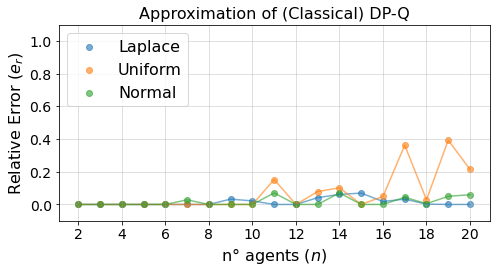

In [12]:
font=14

fig, ax = plt.subplots(figsize=(7,3.9))
fig.set_tight_layout(True)
# for i, g in data.groupby('Distribution'):
#     g.plot(x='n', y='Error', ax=ax, label=str(i), style='o-', alpha=.6)#, marker='8', markersize=8, alpha=.6)#, yerr='std_acc')
# #     plt.fill_between(x=g['n_agents'], y1 = g['time'] - g['std'], y2 = g['time'] + g['std'], alpha=0.2)


for distr in df.Distribution.unique():
    current_data = data[data.Distribution == distr]
    
    x = current_data['n'].to_numpy()

    y = current_data['Error'].astype(float).to_numpy()
    
    ax.plot(x, y, alpha=.6)
    ax.scatter(x, y, label=distr.capitalize(), alpha=.6)


ax.set_ylabel(r'Relative Error $(e_r)$',fontdict={'fontsize':font+2})

ax.set_xlabel(r'n° agents $(n)$',fontdict={'fontsize':font+2})
ax.set_ylim(-.1, 1.1)

ax.set_xticks(ticks=np.arange(0, 20, 2))
ax.set_yticks(ticks=np.arange(0, 1.1, .2))

ax.tick_params(axis='both', which='major', labelsize=font)

ax.grid(alpha=.5)
ax.legend(fontsize=font+2, loc="upper left")

ax.set_title("Approximation of (Classical) DP-Q", fontsize = font+2)

file = os.path.join(current_folder, 'MINCUT_Acc.png')
plt.savefig(file, dpi=500, bbox_inches = "tight")

In [13]:
data = pd.concat([df["Distribution"] , df["No. of Agents"], df[('Dwave Annealer', 'Quality')]], axis = 1)
data.columns = ["Distribution", "n", "Quality"]
data.Quality = data.Quality.astype(float)
data['Error'] = 1-data.Quality

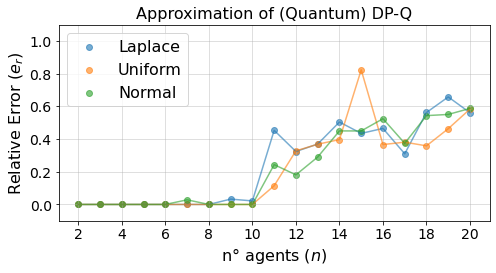

In [14]:
font=14

fig, ax = plt.subplots(figsize=(7,3.9))
fig.set_tight_layout(True)


for distr in df.Distribution.unique():
    current_data = data[data.Distribution == distr]
    
    x = current_data['n'].to_numpy()

    y = current_data['Error'].astype(float).to_numpy()
    
    ax.plot(x, y, alpha=.6)
    ax.scatter(x, y, label=distr.capitalize(), alpha=.6)


ax.set_ylabel(r'Relative Error $(e_r)$',fontdict={'fontsize':font+2})

ax.set_xlabel(r'n° agents $(n)$',fontdict={'fontsize':font+2})
ax.set_ylim(-.1, 1.1)

ax.set_xticks(ticks=np.arange(0, 20, 2))
ax.set_yticks(ticks=np.arange(0, 1.1, .2))

ax.tick_params(axis='both', which='major', labelsize=font)

ax.grid(alpha=.5)
ax.legend(fontsize=font+2, loc="upper left")


ax.set_title("Approximation of (Quantum) DP-Q", fontsize = font+2)

file = os.path.join(current_folder, 'QA_Acc.png')
plt.savefig(file, dpi=500, bbox_inches = "tight")

### QA runtime up to 65 agents

In [15]:
report_filename = "IDP_report_0001_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_topdown_qubo = bool(int(report_filename.split('_')[-2][2]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][3]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [16]:
current_folder = file = os.path.join(folder, 'QA_runtime')
create_dir(current_folder)

In [17]:
pd.set_option('display.max_rows', None)
df.head()

Distribution No. of Agents         Brute Force                      \
                                          Result               Value   
0      laplace             2             ['1,2']                 2.5   
1      laplace             3        ['3', '1,2']                 2.5   
2      laplace             4   ['2,4', '3', '1']                2.89   
3      laplace             5    ['1,2,5', '3,4']  21.639999999999997   
4      laplace             6  ['1,3,6', '2,4,5']  21.099999999999998   

                         Top-down approach using min-cut                      \
                     TTE                          Result               Value   
0  0.0009906291961669922                         ['1,2']                 2.5   
1                    0.0                    ['3', '1,2']                 2.5   
2                    0.0               ['2,4', '3', '1']                2.89   
3  0.0009961128234863281                ['1,2,5', '3,4']  21.639999999999997   
4   0.001994609832763672              ['1,3,6', '2,4,5']  21.099999999999998   

                                      Dwave Annealer                      \
                     TTE Quality              Result               Value   
0                    0.0     1.0             ['1,2']                 2.5   
1  0.0010154247283935547     1.0        ['3', '1,2']                 2.5   
2  0.0009951591491699219     1.0   ['1', '3', '2,4']                2.89   
3                    0.0     1.0    ['1,2,5', '3,4']  21.639999999999997   
4  0.0009975433349609375     1.0  ['1,3,6', '2,4,5']  21.099999999999998   

                               
                  TTE Quality  
0                 0.0     1.0  
1   5.409874200820923     1.0  
2   9.935318231582642     1.0  
3   10.16195011138916     1.0  
4  14.997750997543335     1.0

In [18]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))
df.head()

Distribution No. of Agents      Dwave Annealer                      \
                                          Result               Value   
0      laplace             2             ['1,2']                 2.5   
1      laplace             3        ['1,2', '3']                 2.5   
2      laplace             4   ['3', '2,4', '1']                2.89   
3      laplace             5    ['1,2,5', '3,4']  21.639999999999997   
4      laplace             6  ['1,3,6', '2,4,5']  21.099999999999998   

                               
                  TTE Quality  
0                 0.0    None  
1   7.416107177734375    None  
2   14.90334439277649    None  
3  15.799315452575684    None  
4  20.980942964553833    None

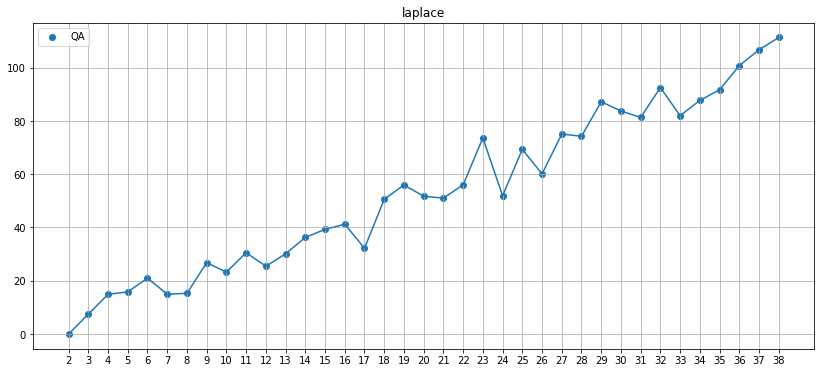

In [19]:
import matplotlib.pyplot as plt
for distr in df.Distribution.unique():
    data = df[df.Distribution == distr]
    
    
    plt.figure(figsize=(14,6))
    x = data['No. of Agents'].to_numpy()
    y_QA = data[('Dwave Annealer', 'TTE')].astype(float).to_numpy()
    
    plt.scatter(x, y_QA, label='QA')
    plt.plot(x, y_QA)
    
    plt.grid()
    plt.title(distr)
    plt.legend()
    file = os.path.join(current_folder, distr + '.png')
    plt.savefig(file, dpi=300, bbox_inches = "tight")
    plt.show()


In [20]:
report_filename = "IDP_report_011_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][2]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [21]:
current_folder = file = os.path.join(folder, 'QA_runtime')
create_dir(current_folder)

In [22]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))
pd.set_option('display.max_rows', None)
df.head()

Distribution No. of Agents Top-down approach using min-cut  \
                                                      Result   
0      laplace             2                         ['1,2']   
1      laplace             3                    ['3', '1,2']   
2      laplace             4               ['2,4', '3', '1']   
3      laplace             5                ['1,2,5', '3,4']   
4      laplace             6              ['1,3,6', '2,4,5']   

                                                          Dwave Annealer  \
                Value                    TTE Quality              Result   
0                 2.5                    0.0       1             ['1,2']   
1                 2.5                    0.0       1        ['1,2', '3']   
2                2.89                    0.0       1   ['1', '3', '2,4']   
3  21.639999999999997                    0.0       1    ['1,2,5', '3,4']   
4  21.099999999999998  0.0010342597961425781       1  ['2,4,5', '1,3,6']   

                                                  
                Value                TTE Quality  
0                 2.5                0.0     1.0  
1                 2.5  5.190215110778809     1.0  
2                2.89  10.37340497970581     1.0  
3  21.639999999999997  9.827338695526123     1.0  
4  21.099999999999998  14.80012822151184     1.0

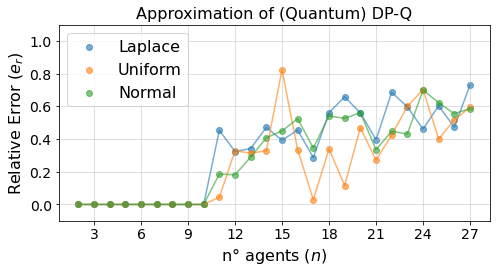

In [27]:
data = pd.concat([df["Distribution"] , df["No. of Agents"], df[('Dwave Annealer', 'Quality')]], axis = 1)
data.columns = ["Distribution", "n", "Quality"]
data.Quality = data.Quality.astype(float)

data['Error'] = 1-data.Quality

font=14

fig, ax = plt.subplots(figsize=(7,3.9))
fig.set_tight_layout(True)
# for i, g in data.groupby('Distribution'):
#     g.plot(x='n', y='Error', ax=ax, label=str(i), style='o-', alpha=.6)#, marker='8', markersize=8, alpha=.6)#, yerr='std_acc')
# #     plt.fill_between(x=g['n_agents'], y1 = g['time'] - g['std'], y2 = g['time'] + g['std'], alpha=0.2)


for distr in df.Distribution.unique():
    current_data = data[data.Distribution == distr]
    
    x = current_data['n'].to_numpy()

    y = current_data['Error'].astype(float).to_numpy()
    
    ax.plot(x, y, alpha=.6)
    ax.scatter(x, y, label=distr.capitalize(), alpha=.6)


ax.set_ylabel(r'Relative Error $(e_r)$',fontdict={'fontsize':font+2})

ax.set_xlabel(r'n° agents $(n)$',fontdict={'fontsize':font+2})
ax.set_ylim(-.1, 1.1)

ax.set_xticks(ticks=np.arange(1, 27, 3))
ax.set_yticks(ticks=np.arange(0, 1.1, .2))

ax.tick_params(axis='both', which='major', labelsize=font)

ax.grid(alpha=.5)
ax.legend(fontsize=font+2, loc="upper left")

plt.title("Approximation of (Quantum) DP-Q", fontsize = font+2)


file = os.path.join(current_folder, 'QA_Acc vs Min-cut.png')
plt.savefig(file, dpi=500, bbox_inches = "tight")